# Section 1: Importations

In [1848]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

In [1849]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import SCORERS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV


# Section 2: Import the training data and test data

In [1850]:
path = '/home/nick/Desktop/kaggle_titanic/'

train_df = pd.read_csv(path + 'train.csv') 
test_df = pd.read_csv(path + 'test.csv') 

In [1851]:
# set the index as PassengerId:

def set_index(df, column_name):
    """
    Set the index of the dataframe to column_name. 
    """
    return df.set_index(column_name)

train_df = set_index(train_df, 'PassengerId')
test_df = set_index(test_df, 'PassengerId')

display(train_df.head(5))
display(test_df.head(5))

display(train_df.shape)
display(test_df.shape)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(891, 11)

(418, 10)

In [1852]:
display(train_df.Survived.value_counts())
# it is not perfectly balanced

display(342/train_df.shape[0])

0    549
1    342
Name: Survived, dtype: int64

0.3838383838383838

# Section 3: Check the number of missing values, and drop columns with more that 50% of  missing values

In [1853]:
def show_number_na(df):
    """
    Print the number of missing values for each column. 
    """
    return df.isna().sum()

print(show_number_na(train_df))
print('------')
print(show_number_na(test_df))

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
------
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [1854]:
# Age, Fare, Cabin, Embarked contain missing values. 

In [1855]:
# missing  values in percentage terms: 

def perc_missing_values(df):
    """
    Print the percentage of missing values for each column. 
    """
    perc = df.isna().sum()/df.shape[0]
    return perc 

print(perc_missing_values(train_df))
print(perc_missing_values(test_df))

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64


In [1856]:
# I drop cabin (see https://www.kaggle.com/questions-and-answers/274314):
def drop_column(df):
    """
    Drop a column of the dataframe if that column has more than 50% missing values. 
    """
    dropped_variables = []
    
    for i in df.columns:
        number_missing_val = df[i].isna().sum()  
        if number_missing_val/df.shape[0]>=0.5:
            df = df.drop([i], axis=1)
            dropped_variables.append(i)
        else:
            pass
    return df, dropped_variables


print('dropped columns for train_df:')
train_df, dropped_train = drop_column(train_df)
print(dropped_train)

print("") 

print('dropped columns for test_df:')
test_df, dropped_test = drop_column(test_df)
print(dropped_test)

print("") 

print('missing values of train_df:')
print(perc_missing_values(train_df))

print("") 

print('missing values of test_df:')
print(perc_missing_values(test_df))

dropped columns for train_df:
['Cabin']

dropped columns for test_df:
['Cabin']

missing values of train_df:
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

missing values of test_df:
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64


# Section 4: Identify ways to impute missing values, and perform imputations (use the training set only for the imputations, not the test set)

Section 4A: Imputing 'Age', 'Fare': 

In [1857]:
train_df[[x for x in train_df.columns if x!='Survived']].corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1858]:
test_df.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [1859]:
# it looks like Age and Fare have the strongest correlation with Pclass: For this reason, I use 
# I use the median value of Age (or Fare) by Pclass as imputation technique. 

In [1860]:
def store_medians(df, grouping_var, variables):
    """
    Create a dataframe including only the medians of "variables" by grouping_var. 
    """
    medians_by_Pclass = df.groupby(grouping_var)[variables].median()
    return medians_by_Pclass

medians_by_Pclass = store_medians(train_df, 'Pclass', ['Age', 'Fare'])
# medians_by_Pclass = train_df.groupby('Pclass')[['Age', 'Fare']].median()
display(medians_by_Pclass)

with open(path + 'pickle_file_age_fare.pkl', 'wb') as pickle_imp_age_fare: 
    pickle.dump(medians_by_Pclass, pickle_imp_age_fare)
    
# # check the pickle file: 
# with open(path + 'pickle_file_age_fare.pkl', 'rb') as pickle_imp_age_fare_load: 
#     loaded_object = pickle.load(pickle_imp_age_fare_load)
# loaded_object    

,Age,Fare
Pclass,,
1,37.0,60.2875
2,29.0,14.2500
3,24.0,8.0500


In [1861]:
# store the rows with ('Age' = missing values): 
check_age = train_df[train_df['Age'].isnull()]
check_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [1862]:
# create a function that assigns medians_by_Pclass to the NA-s of the train_df/test_df: 

In [1863]:
def impute_age_fare(df, 
                    grouping_var = 'Pclass', 
                    pickle_path = path + 'pickle_file_age_fare.pkl', 
                    col_name = ['Age', 'Fare']):
    """
    Assign medians_by_Pclass to the NA-s of the dataframe called "df". 
    """
    # load the imputation dataframe: 
    with open(pickle_path, 'rb') as pickle_imp_age_fare_load: 
        imputation_df = pickle.load(pickle_imp_age_fare_load)   
    
    for i in col_name: # do it for all the variables included in col_name
        # create a dictionary: key-values are represented by Pclass-i:
        dict_imp = dict(imputation_df[i])
        for j,value in dict_imp.items():    
            #select rows such that: (Pclass = j) and (Age or Fare is null),and assign "value"
            df.loc[(df[grouping_var]==j) & (df[i].isnull()), i] = value 
           
    return df

In [1864]:
train_df = impute_age_fare(train_df)
display(train_df.isna().sum())

test_df = impute_age_fare(test_df)
display(test_df.isna().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [1865]:
# yes, it worked as expected. use check_age created above, and confront it with train_df!

In [1866]:
check_age.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C


In [1867]:
train_df.head(40)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


Section 4B: Imputing 'Embarked' (I simply use the mode/most common value of Embarked from the training set): 

(Note: there are only 2 missing values in the training set, none in the test set. )

In [1868]:
mode_Embarked = train_df.Embarked.mode()[0]
with open(path + 'pickle_file_for_embarked_imp.pkl', 'wb') as pickle_file_Embarked:
    pickle.dump(mode_Embarked, pickle_file_Embarked)
    pickle_file_Embarked.close()
    
# # check the pickle file: 
# with open(path + 'pickle_file_for_embarked_imp.pkl', 'rb') as pickle_file_Embarked_read:
#     imput_embarked = pickle.load(pickle_file_Embarked_read)
    
# imput_embarked

In [1869]:
def imputation_missings(df, pickle_path, col_name = 'Embarked'):
    """
    Imputation for the the column named 'col_name'. 
    """
    count_missing_val = df[col_name].isna().sum()
    if count_missing_val == 0:
        pass 
    else: 
        pickle_file = open(pickle_path, 'rb')
        imp_value = pickle.load(pickle_file)
        pickle_file.close()
        # materially fill the NA-s: 
        df[col_name].fillna(imp_value, inplace = True)
    
    return df
    
test_df = imputation_missings(test_df, path + 'pickle_file_for_embarked_imp.pkl', 'Embarked')
train_df = imputation_missings(train_df, path + 'pickle_file_for_embarked_imp.pkl', 'Embarked')

print("") 

print('missing values of train_df:')
print(perc_missing_values(train_df))

print("") 

print('missing values of test_df:')
print(perc_missing_values(test_df))


missing values of train_df:
Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

missing values of test_df:
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [1870]:
# there is no missing value anymore, neither in the train_df nor test_df

# Section 5: Feature Engineering

Section 5A: Feature Engineering for "Ticket" column

In [1871]:
# check whether "ticket" is similar between train_df and test_df 

In [1872]:
train_ticket_list = list(set(train_df.Ticket))
len(train_ticket_list)
# output: 681. thus there are some common values of Ticket among the 981 rows/data points. 

681

In [1873]:
test_ticket_list = list(set(test_df.Ticket))
len(test_ticket_list)
# output: 363. thus there are some common values of Ticket among the 418 rows/data points. 

363

In [1874]:
common_values_Ticket_tr_test = [x for x in test_ticket_list  if x in train_ticket_list]
len(common_values_Ticket_tr_test)

115

In [1875]:
different_values_Ticket_tr_test = [x for x in test_ticket_list  if x not in train_ticket_list]
len(different_values_Ticket_tr_test)

248

In [1714]:
# There are 115 values in common for Ticket (between train_df and test_df) out of 363 distinct values.  

https://www.kaggle.com/getting-started/77861:
        
- "recode the categories so that the rare values are now common. For example. creating a category 'other' for all those mismatched categories." 


In [1715]:
def recode_ticket(df, common_values_Ticket_tr_test, col_name="Ticket"):
    """
    Recode the Ticket column: if a category is not share between train_df and test_df (use common_values_Ticket_tr_test), 
    then set it to "other".
    """
    df[col_name] = df[col_name].map(lambda x: x if x in common_values_Ticket_tr_test else 'other')
    
    return df[col_name]

train_df['Ticket'] = recode_ticket(train_df, common_values_Ticket_tr_test, "Ticket")
test_df['Ticket'] = recode_ticket(test_df, common_values_Ticket_tr_test, "Ticket")  

In [1716]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,other,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,other,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,other,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,other,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,other,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,other,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S


In [1877]:
# check whether recode_ticket() worked correctly: 
display(train_df.Ticket.nunique())
display(test_df.Ticket.nunique())

commo_values_Tckt = [x for x in list(set(test_df.Ticket))  if x  in list(set(train_df.Ticket)) ]
display(len(commo_values_Tckt))
#display(commo_values_Tckt)

diff_values_Tckt = [x for x in list(set(test_df.Ticket))  if x not in list(set(train_df.Ticket)) ]
display(len(diff_values_Tckt))
#display(diff_values_Tckt)

681

363

115

248

In [1718]:
def create_dummies(df, col_name=['Ticket']):
    """
    Create dummies from a categorical variable. 
    """
    df = pd.get_dummies(df, columns=col_name) 
    return df

train_df = create_dummies(train_df, ['Ticket'])
test_df = create_dummies(test_df, ['Ticket'])

Section 5B: Feature engineering for "Age"

In [1719]:
# is Age strongly correlated with Survived? 
train_df.corr()
# answer: low correlation

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_110813,Ticket_112058,Ticket_113059,Ticket_113503,...,Ticket_S.C./PARIS 2079,Ticket_S.O.C. 14879,Ticket_SC/AH 29037,Ticket_SC/AH 3085,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_other
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,0.042470,-0.026456,-0.026456,-0.026456,...,0.011329,-0.059292,-0.026456,0.042470,-0.026456,0.033803,-0.037436,-0.053002,-0.026456,-0.123204
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.052496,-0.052496,-0.052496,-0.052496,...,-0.017519,-0.027747,-0.012381,-0.012381,-0.012381,-0.021469,0.039243,0.055561,-0.052496,0.114142
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078333,0.020090,-0.002700,-0.005233,...,-0.046820,-0.033293,0.020090,0.032752,-0.000168,-0.054447,-0.018154,-0.028239,0.042881,0.113248
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,0.014507,-0.015907,-0.015907,-0.015907,...,-0.000990,0.046145,0.014507,0.014507,0.014507,0.025156,0.020528,0.059529,0.014507,-0.404470
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.015878,-0.015878,-0.015878,0.067340,...,0.065848,-0.035583,-0.015878,-0.015878,-0.015878,0.116767,0.095286,0.176586,-0.015878,-0.405794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticket_SC/Paris 2123,0.033803,-0.021469,-0.054447,0.025156,0.116767,0.010972,-0.001948,-0.001948,-0.001948,-0.001948,...,-0.002757,-0.004366,-0.001948,-0.001948,-0.001948,1.000000,-0.002757,-0.003903,-0.001948,-0.105657
Ticket_W./C. 6607,-0.037436,0.039243,-0.018154,0.020528,0.095286,-0.008360,-0.001590,-0.001590,-0.001590,-0.001590,...,-0.002250,-0.003563,-0.001590,-0.001590,-0.001590,-0.002757,1.000000,-0.003185,-0.001590,-0.086220
Ticket_W./C. 6608,-0.053002,0.055561,-0.028239,0.059529,0.176586,0.002935,-0.002251,-0.002251,-0.002251,-0.002251,...,-0.003185,-0.005045,-0.002251,-0.002251,-0.002251,-0.003903,-0.003185,1.000000,-0.002251,-0.122071
Ticket_W.E.P. 5734,-0.026456,-0.052496,0.042881,0.014507,-0.015878,0.019553,-0.001124,-0.001124,-0.001124,-0.001124,...,-0.001590,-0.002518,-0.001124,-0.001124,-0.001124,-0.001948,-0.001590,-0.002251,1.000000,-0.060932


<AxesSubplot:>

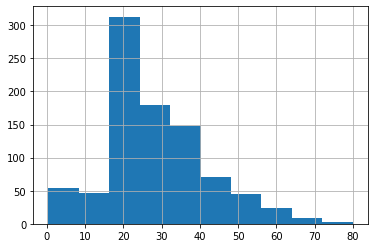

In [1720]:
train_df.Age.hist()

<AxesSubplot:>

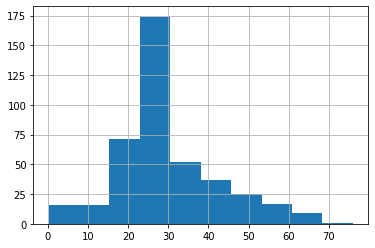

In [1721]:
test_df.Age.hist()

In [1722]:
def create_age_groups(df, col_name="Age"):
    """
    Create age groups from the discrete "Age" variable. 
    """
    new_col_name = col_name + '_groups' 
    df[new_col_name] = pd.cut(x=df[col_name], 
                     bins=[0, 3, 17, 63, 99],
                     labels=['Baby_Toddler', 'Child', 'Adult', 'Elderly']) 
    # labels=['Baby/Toddler', 'Child', 'Adult', 'Elderly']: see https://www.geeksforgeeks.org/pandas-cut-continuous-to-categorical/
    return df[new_col_name]

train_df['Age_groups'] = create_age_groups(train_df, "Age")
test_df['Age_groups'] = create_age_groups(test_df, "Age")

# create the dummies: 
train_df = create_dummies(train_df, ['Age_groups'])
train_df

test_df = create_dummies(test_df, ['Age_groups'])
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_110813,Ticket_112058,...,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_other,Age_groups_Baby_Toddler,Age_groups_Child,Age_groups_Adult,Age_groups_Elderly
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,0,...,0,0,0,0,0,1,0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,...,0,0,0,0,0,1,0,0,1,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,0,...,0,0,0,0,0,1,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,0,...,0,0,0,0,0,1,0,0,1,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,1,0,0,1,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,...,0,0,0,0,0,0,0,0,1,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,0,...,0,0,0,0,0,1,0,0,1,0


In [1723]:
train_df.corr()  

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_110813,Ticket_112058,Ticket_113059,Ticket_113503,...,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_other,Age_groups_Baby_Toddler,Age_groups_Child,Age_groups_Adult,Age_groups_Elderly
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,0.042470,-0.026456,-0.026456,-0.026456,...,-0.026456,0.033803,-0.037436,-0.053002,-0.026456,-0.123204,0.108558,0.072585,-0.090315,-0.076793
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.052496,-0.052496,-0.052496,-0.052496,...,-0.012381,-0.021469,0.039243,0.055561,-0.052496,0.114142,0.050193,0.112678,-0.085231,-0.100953
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078333,0.020090,-0.002700,-0.005233,...,-0.000168,-0.054447,-0.018154,-0.028239,0.042881,0.113248,-0.386298,-0.420368,0.424655,0.366027
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,0.014507,-0.015907,-0.015907,-0.015907,...,0.014507,0.025156,0.020528,0.059529,0.014507,-0.404470,0.204989,0.243822,-0.295467,-0.040758
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.015878,-0.015878,-0.015878,0.067340,...,-0.015878,0.116767,0.095286,0.176586,-0.015878,-0.405794,0.228247,0.222062,-0.307537,0.012075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticket_other,-0.123204,0.114142,0.113248,-0.404470,-0.405794,-0.413025,-0.060932,-0.060932,-0.060932,-0.060932,...,-0.060932,-0.105657,-0.086220,-0.122071,-0.060932,1.000000,-0.177247,-0.088850,0.158085,0.022612
Age_groups_Baby_Toddler,0.108558,0.050193,-0.386298,0.204989,0.228247,0.004360,-0.006257,-0.006257,-0.006257,-0.006257,...,-0.006257,0.096561,-0.008854,-0.012535,-0.006257,-0.177247,1.000000,-0.059826,-0.459944,-0.022713
Age_groups_Child,0.072585,0.112678,-0.420368,0.243822,0.222062,-0.011346,-0.010743,-0.010743,-0.010743,-0.010743,...,-0.010743,-0.018629,-0.015202,0.094001,-0.010743,-0.088850,-0.059826,1.000000,-0.789730,-0.038999
Age_groups_Adult,-0.090315,-0.085231,0.424655,-0.295467,-0.307537,-0.005006,0.013604,0.013604,0.013604,0.013604,...,0.013604,-0.032014,0.019249,-0.069107,0.013604,0.158085,-0.459944,-0.789730,1.000000,-0.299826


In [1724]:
# Age_groups' dummies are more correlated with Survived (compared to "Age"). 
# conclusion: use Age_groups' dummies rather than Age. 

Section 5C: Feature engineering for "Pclass"

In [1725]:
train_df = create_dummies(train_df, ['Pclass'])
test_df = create_dummies(test_df, ['Pclass'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058',
       ...
       'Ticket_W./C. 6608', 'Ticket_W.E.P. 5734', 'Ticket_other',
       'Age_groups_Baby_Toddler', 'Age_groups_Child', 'Age_groups_Adult',
       'Age_groups_Elderly', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object', length=131)

Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058', 'Ticket_113059',
       ...
       'Ticket_W./C. 6608', 'Ticket_W.E.P. 5734', 'Ticket_other',
       'Age_groups_Baby_Toddler', 'Age_groups_Child', 'Age_groups_Adult',
       'Age_groups_Elderly', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object', length=130)

Section 5D: Feature engineering for "sex"

In [1726]:
train_df = create_dummies(train_df, ['Sex'])
test_df = create_dummies(test_df, ['Sex'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058', 'Ticket_113059',
       ...
       'Ticket_other', 'Age_groups_Baby_Toddler', 'Age_groups_Child',
       'Age_groups_Adult', 'Age_groups_Elderly', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=132)

Index(['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503',
       ...
       'Ticket_other', 'Age_groups_Baby_Toddler', 'Age_groups_Child',
       'Age_groups_Adult', 'Age_groups_Elderly', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=131)

Section 5E: Feature engineering for "SibSp"

In [1727]:
train_df.SibSp.min(), train_df.SibSp.max()

(0, 8)

In [1728]:
test_df.SibSp.min(), test_df.SibSp.max()

(0, 8)

In [1729]:
train_df[['Survived', 'SibSp', 'Parch']].corr()

,Survived,SibSp,Parch
Survived,1.000000,-0.035322,0.081629
SibSp,-0.035322,1.000000,0.414838
Parch,0.081629,0.414838,1.000000


In [1730]:
train_df = create_dummies(train_df, ['SibSp'])
test_df = create_dummies(test_df, ['SibSp'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503',
       ...
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object', length=138)

Index(['Name', 'Age', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503', 'Ticket_113509',
       ...
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object', length=137)

In [1731]:
train_df[['Survived', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']].corr() 

,Survived,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
Survived,1.000000,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292,-0.070234
SibSp_0,-0.115867,1.000000,-0.811408,-0.264017,-0.198205,-0.210469,-0.110110,-0.130431
SibSp_1,0.173076,-0.811408,1.000000,-0.099714,-0.074858,-0.079490,-0.041586,-0.049261
SibSp_2,0.029796,-0.264017,-0.099714,1.000000,-0.024357,-0.025864,-0.013531,-0.016029
SibSp_3,-0.037215,-0.198205,-0.074858,-0.024357,1.000000,-0.019417,-0.010158,-0.012033
SibSp_4,-0.064123,-0.210469,-0.079490,-0.025864,-0.019417,1.000000,-0.010787,-0.012778
SibSp_5,-0.059292,-0.110110,-0.041586,-0.013531,-0.010158,-0.010787,1.000000,-0.006685
SibSp_8,-0.070234,-0.130431,-0.049261,-0.016029,-0.012033,-0.012778,-0.006685,1.000000


In [1732]:
# use dummies rather than the categorical "SibSp"

Section 5F: Feature engineering for "Parch"

In [1733]:
train_df[['Survived', 'Parch']].corr() 

,Survived,Parch
Survived,1.000000,0.081629
Parch,0.081629,1.000000


In [1734]:
# how many categories exist in train_df and in test_df? 
print(train_df.Parch.min(), train_df.Parch.max())
print(test_df.Parch.min(), test_df.Parch.max())

print("")
print(train_df.Parch.value_counts(), test_df.Parch.value_counts())


0 6
0 9

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


In [1735]:
def recode_parch(df, col_name='Parch'):
    """
    Recode Parch to have categories from 1 to 6. Category 1 represents having zero or 1 ParCh. 
    Category 6 represents having 6 ParCh or more than 6 ParCh. 
    """
    df[col_name] = df[col_name].map(lambda x: 6 if x>6 else x)
    df[col_name] = df[col_name].map(lambda x: 1 if x<1 else x)
    return df[col_name] 

In [1736]:
train_df['Parch'] = recode_parch(train_df, 'Parch')
test_df['Parch'] = recode_parch(test_df, 'Parch')

print(train_df.Parch.value_counts()) 
print(test_df.Parch.value_counts())

1    796
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
1    376
2     33
3      3
6      3
4      2
5      1
Name: Parch, dtype: int64


In [1737]:
train_df = create_dummies(train_df, ['Parch'])
test_df = create_dummies(test_df, ['Parch'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503', 'Ticket_113509',
       ...
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object', length=143)

Index(['Name', 'Age', 'Fare', 'Embarked', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object', length=142)

In [1738]:
train_df[['Survived', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6']].corr() 

,Survived,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
Survived,1.000000,-0.056346,0.075020,0.033391,-0.053002,-0.028398,-0.026456
Parch_1,-0.056346,1.000000,-0.909137,-0.217452,-0.194385,-0.217452,-0.097029
Parch_2,0.075020,-0.909137,1.000000,-0.023594,-0.021091,-0.023594,-0.010528
Parch_3,0.033391,-0.217452,-0.023594,1.000000,-0.005045,-0.005643,-0.002518
Parch_4,-0.053002,-0.194385,-0.021091,-0.005045,1.000000,-0.005045,-0.002251
Parch_5,-0.028398,-0.217452,-0.023594,-0.005643,-0.005045,1.000000,-0.002518
Parch_6,-0.026456,-0.097029,-0.010528,-0.002518,-0.002251,-0.002518,1.000000


Section 5G: Feature engineering for "Embarked"

In [1739]:
train_df = create_dummies(train_df, ['Embarked'])
test_df = create_dummies(test_df, ['Embarked'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=145)

Index(['Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       'Ticket_113781',
       ...
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=144)

Section 5H: Feature engineering for "Fare"

<AxesSubplot:>

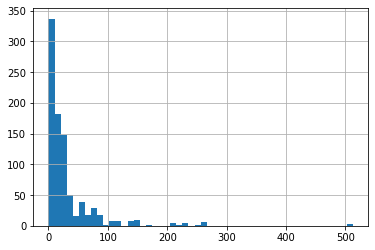

In [1740]:
train_df.Fare.hist(bins=50)

<AxesSubplot:>

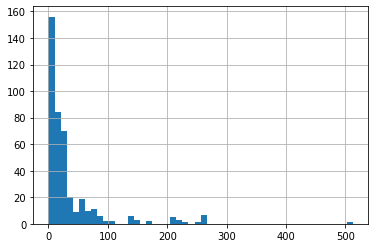

In [1741]:
test_df.Fare.hist(bins=50)

In [1742]:
train_df[['Survived', "Fare"]].corr()

,Survived,Fare
Survived,1.000000,0.257307
Fare,0.257307,1.000000


In [1743]:
# I simply use "Fare" and i don't create categorical dummies out of Fare, because the correlation is not too low. 

Section 5I: Feature engineering for "Name"

In [1744]:
# extract the titles such as "Mr.", "Dr.", etcetera

In [1745]:
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [1746]:
list_names_test = list(set(test_df['Title'] ))
list_names_train = list(set(train_df['Title'] ))

list_common_titles = [x for x in list_names_test if x in list_names_train ]

In [1747]:
display([x for x in list_names_test if x not in list_names_train ])
display([x for x in list_names_train  if x not in  list_names_test])

['Dona']

['Countess', 'Jonkheer', 'Lady', 'Sir', 'Don', 'Mlle', 'Capt', 'Mme', 'Major']

In [1748]:
list_common_titles

['Miss', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

In [1749]:
# I use the recode_ticket() function created above to recode some categories to "other"

train_df['Title'] = recode_ticket(train_df, list_common_titles, "Title")
test_df['Title'] = recode_ticket(test_df, list_common_titles, "Title")  

In [1750]:
display([x for x in list(set(train_df['Title']))])
display([x for x in list(set(test_df['Title']))])

['Miss', 'other', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

['Miss', 'other', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

In [1751]:
display(train_df['Title'].value_counts())
display(test_df['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
other      11
Dr          7
Rev         6
Col         2
Ms          1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
other       1
Name: Title, dtype: int64

In [1752]:
train_df = create_dummies(train_df, ['Title'])
test_df = create_dummies(test_df, ['Title'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'Embarked_S', 'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_other'],
      dtype='object', length=154)

Index(['Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       'Ticket_113781',
       ...
       'Embarked_S', 'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_other'],
      dtype='object', length=153)

Section 5J: Final chacks on feature eng: 

In [1753]:
len(train_df.columns), len(test_df.columns)

(154, 153)

In [1754]:
[x for x in train_df.columns if x not in test_df.columns]

['Survived']

In [1755]:
[x for x in  test_df.columns if x not in train_df.columns]

[]

In [1756]:
# It is as expected. 

In [1757]:
# check NA-s: 
test_df.isna().sum().sum(), train_df.isna().sum().sum()

(0, 0)

Section 5K: drop the columns that will not be used in modeling: 

In [1758]:
pd.DataFrame(train_df.columns).head(20), pd.DataFrame(train_df.columns).tail(20)

(                0
 0        Survived
 1            Name
 2             Age
 3            Fare
 4   Ticket_110813
 5   Ticket_112058
 6   Ticket_113059
 7   Ticket_113503
 8   Ticket_113509
 9   Ticket_113773
 10  Ticket_113781
 11  Ticket_113796
 12   Ticket_11753
 13   Ticket_11765
 14   Ticket_11767
 15   Ticket_11769
 16   Ticket_11813
 17   Ticket_12749
 18   Ticket_13567
 19    Ticket_1601,
                 0
 134       SibSp_5
 135       SibSp_8
 136       Parch_1
 137       Parch_2
 138       Parch_3
 139       Parch_4
 140       Parch_5
 141       Parch_6
 142    Embarked_C
 143    Embarked_Q
 144    Embarked_S
 145     Title_Col
 146      Title_Dr
 147  Title_Master
 148    Title_Miss
 149      Title_Mr
 150     Title_Mrs
 151      Title_Ms
 152     Title_Rev
 153   Title_other)

In [1759]:
# drop Age, Name. All the remaining columns will be used. 

def dropping_columns(df, col_name=['Age', 'Name']):
    """
    Drop columns that will not be used in modeling. 
    """
    df = df.drop(columns=col_name)
    return df
    
    
train_df = dropping_columns(train_df, ['Age', 'Name'])
test_df = dropping_columns(test_df, ['Age', 'Name'])

print(len(train_df.columns), len(test_df.columns))
print(["Age" in train_df.columns], ["Age" in test_df.columns], ["Name" in train_df.columns], ["Name" in test_df.columns],) 

152 151
[False] [False] [False] [False]


In [1760]:
# check the types of columns: 

In [1761]:
list(train_df.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint

In [1762]:
list(test_df.dtypes)

[dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint

In [1763]:
# end of feature eng.

# Section 6: Modeling using a simple train_test_split() and without cross-validation

In [1764]:
# create X and y matrices:
y = train_df['Survived']
X = train_df.copy(deep=True).drop(columns=['Survived'])

display(y.shape)
display(X.shape)

(891,)

(891, 151)

In [1765]:
#Splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1782]:
def fit_and_predit(x_train, y_train, x_test, algorithm):
    """
    Fit on the training set and predict on the test set. Save the predictions in the "predictions"
    numpy array.
    """
    model = algorithm
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return predictions

In [1783]:
def confusion_matrix_and_accuracy(y_test, predictions): 
    """
    Print the confusion matrix, and print the accuracy on the test set (accuracy = (TP+TN)/(TP+TN+FP+FN)). 
    """
    print('The confusion matrix on the test set is as follows:')
    print(pd.DataFrame(confusion_matrix(y_test, predictions)))
    
    accuracy = (confusion_matrix(y_test, predictions)[0][0] \
                + confusion_matrix(y_test, predictions)[1][1] )  \
                / (y_test.shape[0])
    print('The accuracy on the test set is: ', accuracy)                                                                                                                                      
    return None

Section 6A: Very simple modeling using LogisticRegression() class and using a simple train_test_split(), not cross-validation with folds: 

In [1784]:
preds_log_reg = fit_and_predit(x_train, y_train, x_test, LogisticRegression(solver='liblinear', random_state = 453))

In [1785]:
confusion_matrix_and_accuracy(y_test, preds_log_reg)

The confusion matrix on the test set is as follows:
    0   1
0  93  17
1  18  51
The accuracy on the test set is:  0.8044692737430168


Kaggle simply uses "accuracy" for the Titanic competition -> see: 
- https://www.kaggle.com/competitions/titanic/overview/evaluation

The scorereported  above (0.810) is not bad. There are only around 430 submissions with a score higher than 0.810 => see:
- https://www.kaggle.com/competitions/titanic/leaderboard 
        
And there are more than 14000 submissions with a score lower than (0.810) -> see: 
-  https://www.kaggle.com/competitions/titanic/leaderboard    

Section 6B: Very simple modeling using DecisionTreeClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1787]:
predictions_dec_tree = fit_and_predit(x_train, y_train, x_test, DecisionTreeClassifier(random_state = 453))

In [1788]:
confusion_matrix_and_accuracy(y_test, predictions_dec_tree)

The confusion matrix on the test set is as follows:
    0   1
0  96  14
1  24  45
The accuracy on the test set is:  0.7877094972067039


Section 6C: Very simple modeling using RandomForestClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1789]:
predictions_rf = fit_and_predit(x_train, y_train, x_test, RandomForestClassifier(n_estimators=500, random_state = 453))

In [1790]:
confusion_matrix_and_accuracy(y_test, predictions_rf)

The confusion matrix on the test set is as follows:
    0   1
0  93  17
1  17  52
The accuracy on the test set is:  0.8100558659217877


Section 6D: Very simple modeling using GradientBoostingClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1794]:
predictions_gb = fit_and_predit(x_train, y_train, x_test, 
                                GradientBoostingClassifier(n_estimators=2000, max_depth=7, random_state=453))
confusion_matrix_and_accuracy(y_test, predictions_gb)

The confusion matrix on the test set is as follows:
    0   1
0  98  12
1  18  51
The accuracy on the test set is:  0.8324022346368715


Section 6E: Very simple modeling using XGBClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

see https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [1795]:
predictions_xgboost = fit_and_predit(x_train, y_train, x_test, 
                                xgb.XGBClassifier(random_state=453))
confusion_matrix_and_accuracy(y_test, predictions_xgboost)

The confusion matrix on the test set is as follows:
    0   1
0  97  13
1  15  54
The accuracy on the test set is:  0.8435754189944135


In [1513]:
# XGBoostClassifier gave the best result up to now!

# Section 7: Hyperparameter optimization of XGBoost Classifier using RandomizedSearchCV


In [1796]:
'accuracy' in sorted(SCORERS.keys())

True

In [1568]:
classifier = xgb.XGBClassifier(random_state=453)

params = {
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200], # , 300, 500, 750, 1000
 'booster': ['gbtree', 'gblinear', 'dart'], 
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30, 0.50, 0.75, 1.00],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100],
 'min_child_weight': [1, 3, 5, 7, 10, 15, 20, 30, 40, 50, 75, 100],
 'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4, 1],
 'colsample_bytree': [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]
}

# see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
rs_model=RandomizedSearchCV(classifier, param_distributions=params, n_iter=2000, 
                            scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [ ]:
#model fitting
#rs_model.fit(X,y) 
rs_model.fit(x_train, y_train) 

In [1570]:
# Time to fit 2000 models (2000*5 = 10000 fitted models because of 5-folds' CV):  
#[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed: 34.4min finished

In [1580]:
#parameters selected
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=90, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=453, reg_alpha=0, ...)

In [1572]:
predictions_CV_xgboost = rs_model.best_estimator_.predict(x_test)

In [1573]:
confusion_matrix(y_test, predictions_CV_xgboost)

array([[101,   9],
       [ 16,  53]])

In [1797]:
print('accuracy of the simple model above is: \n')
(confusion_matrix(y_test, predictions_CV_xgboost)[0][0]  + confusion_matrix(y_test, predictions_CV_xgboost)[1][1] ) / (y_test.shape[0])

accuracy of the simple model above is: 



0.8603351955307262

In [ ]:
# accuracy of the best (XGBOOST) model = 0.860.

In [1577]:
# store the best estimator in a pickle file:

with  open(path+'pickle_best_estimator.pkl', 'wb') as pickle_best_estimator_: 
    pickle.dump(rs_model.best_estimator_, pickle_best_estimator_)

In [1798]:
# reload it: 
with  open(path+'pickle_best_estimator.pkl', 'rb') as pickle_best_estimator_reload: 
    reloaded_best_estimator_ = pickle.load(pickle_best_estimator_reload)

In [1805]:
reloaded_best_estimator_

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=90, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=453, reg_alpha=0, ...)

In [1811]:
reloaded_best_estimator_.booster 

'dart'

In [ ]:
#  Note on the regularization parameters: 
# see https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python
# the default is the use of: 

# (reg_alpha=0) => L1 regularization term on weights is NOT used. 
# (reg_lambda=1) => L2 regularization term on weights IS USED (I.e., Ridge-regression-type regularization).  

# see also: https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6#:~:text=XGBoost%20vs%20Gradient%20Boosting,can%20be%20parallelized%20across%20clusters.

In [1843]:
print(rs_model.best_score_)

0.8356150891362158


fit the best model  again: 

In [1846]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reloaded_best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
print(scores)

print(scores.mean())

[0.84615385 0.86713287 0.82394366 0.78873239 0.85211268]
0.8356150891362158


# Section 8: use the best model stored above, and predict on test_df

In [1820]:
test_df

,Fare,Ticket_110813,Ticket_112058,Ticket_113059,Ticket_113503,Ticket_113509,Ticket_113773,Ticket_113781,Ticket_113796,Ticket_11753,...,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_other
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,7.8292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
893,7.0000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
894,9.6875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
895,8.6625,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
896,12.2875,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1306,108.9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,7.2500,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [1824]:
pred_test_df = reloaded_best_estimator_.predict(test_df)
pred_test_df

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1831]:
display(pred_test_df.shape)
display(pred_test_df.sum())

display(pred_test_df.sum()/pred_test_df.shape[0])

(418,)

151

0.361244019138756

In [1832]:
# The percentage of predicted positives is fairly similar to the percentage of REAL positives of train_df:

display(train_df.Survived.value_counts())
# it is not perfectly balanced

display(342/train_df.shape[0])

0    549
1    342
Name: Survived, dtype: int64

0.3838383838383838

In [1825]:
copy_test_df = test_df.copy(deep=True)

In [1827]:
# reattach the predictions (pred_test_df) to the "copy_test_df" dataframe:

copy_test_df['Survived'] = pred_test_df
copy_test_df

,Fare,Ticket_110813,Ticket_112058,Ticket_113059,Ticket_113503,Ticket_113509,Ticket_113773,Ticket_113781,Ticket_113796,Ticket_11753,...,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_other,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,7.8292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
893,7.0000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
894,9.6875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
895,8.6625,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
896,12.2875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,108.9000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1307,7.2500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1833]:
# check if number of predicted positives match between copy_test_df['Survived'] and pred_test_df: 

copy_test_df['Survived'].sum() ==  pred_test_df.sum()

True

In [1835]:
submission_df = copy_test_df.copy(deep=True)[['Survived']]

In [1836]:
submission_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [1838]:
submission_df.to_csv(path+'submission_df.csv', index=True, header=True)

The above is the file I submitted in Kaggle. 